In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('ProviderInfo_2015.csv')

In [ ]:
import pandas as pd

# List of file names
file_names = ['ProviderInfo_2021.csv', 'ProviderInfo_2020.csv', 'ProviderInfo_2019.csv',
              'ProviderInfo_2018.csv', 'ProviderInfo_2017.csv', 'ProviderInfo_2016.csv', 'ProviderInfo_2015.csv']

# Initialize an empty list to store DataFrames
dfs = []

# Iterate through each file and read into a DataFrame
for file_name in file_names:
    # Try different encodings until one works
    for encoding in ['utf-8', 'latin1', 'iso-8859-1']:
        try:
            df = pd.read_csv(file_name, encoding=encoding)
            dfs.append(df)
            break  # Stop trying encodings if successful
        except UnicodeDecodeError:
            print(f"Failed to read {file_name} with encoding {encoding}. Trying another encoding.")

# Concatenate all DataFrames in the list
df = pd.concat(dfs, ignore_index=True)

# Write the merged DataFrame to a new CSV file
df.to_csv("merged_data.csv", index=False)

print("Merged data saved to merged_data.csv")


Failed to read ProviderInfo_2021.csv with encoding utf-8. Trying another encoding.
Failed to read ProviderInfo_2020.csv with encoding utf-8. Trying another encoding.
Failed to read ProviderInfo_2018.csv with encoding utf-8. Trying another encoding.
Failed to read ProviderInfo_2017.csv with encoding utf-8. Trying another encoding.
Merged data saved to merged_data.csv


In [ ]:
df.describe()

,Provider Zip Code,Provider Phone Number,Provider SSA County Code,Number of Certified Beds,Average Number of Residents per Day,Average Number of Residents per Day Footnote,Overall Rating,Overall Rating Footnote,Health Inspection Rating,Health Inspection Rating Footnote,...,exp_aide,exp_lpn,exp_rn,exp_total,adj_aide,adj_lpn,adj_rn,adj_total,incident_cnt,cmplnt_cnt
count,30612.000000,3.061200e+04,30612.000000,30612.000000,30477.000000,135.0,30172.000000,440.000000,30172.000000,440.000000,...,46755.000000,46755.000000,46755.000000,46755.000000,45619.000000,45619.000000,45619.000000,45619.000000,46958.000000,46958.000000
mean,50308.328695,5.875271e+09,390.119332,106.456259,75.981537,10.0,3.229352,7.684091,2.814729,7.684091,...,2.431442,0.658080,1.087236,4.176758,2.487192,1.072880,0.572982,4.009509,1.051195,3.762895
std,26843.762022,2.331897e+09,273.507873,60.592516,45.885948,0.0,1.404346,8.313215,1.274761,8.313215,...,0.190566,0.095243,0.234808,0.427284,0.637430,0.475443,0.310123,0.918759,2.798608,6.744268
min,660.000000,1.112223e+09,0.000000,1.000000,1.000000,10.0,1.000000,1.000000,1.000000,1.000000,...,1.213330,0.418180,0.470000,2.180000,0.000000,0.000000,0.014280,1.327720,0.000000,0.000000
25%,29824.000000,3.867528e+09,150.000000,65.000000,45.700000,10.0,2.000000,1.000000,2.000000,1.000000,...,2.330695,0.601720,0.929030,3.927095,2.081795,0.792515,0.381410,3.419880,0.000000,0.000000
50%,48812.000000,6.058896e+09,360.000000,99.000000,69.000000,10.0,3.000000,1.000000,3.000000,1.000000,...,2.448360,0.645310,1.060280,4.172940,2.402390,1.050220,0.509620,3.855810,0.000000,1.000000
75%,72823.000000,8.019699e+09,590.000000,127.000000,94.600000,10.0,5.000000,18.000000,4.000000,18.000000,...,2.553420,0.694655,1.206765,4.407915,2.798195,1.309665,0.684460,4.420505,1.000000,5.000000
max,99929.000000,1.000000e+10,996.000000,1389.000000,727.000000,10.0,5.000000,18.000000,5.000000,18.000000,...,3.344450,1.688820,2.776880,7.516560,10.876350,8.566240,8.515480,15.151870,105.000000,193.000000


In [ ]:
print(df.count())

Federal Provider Number    30612
Provider Name              30612
Provider Address           30612
Provider City              30612
Provider State             30612
                           ...  
CYCLE_3_NUMREVIS           46958
CYCLE_3_REVISIT_SCORE      46958
CYCLE_3_TOTAL_SCORE        46958
incident_cnt               46958
cmplnt_cnt                 46958
Length: 231, dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108637 entries, 0 to 108636
Columns: 231 entries, Federal Provider Number to cmplnt_cnt
dtypes: float64(100), object(131)
memory usage: 191.5+ MB


In [ ]:
mask_na = df.isna().sum() /len(df) < 0.6

df = df.loc[ : , mask_na]
df

,PROVNAME,ADDRESS,CITY,STATE,ZIP,PHONE,COUNTY_SSA,OWNERSHIP,BEDCERT,RESTOT,...,cycle_1_nfromcomp,cycle_2_nfromdefs,cycle_2_nfromcomp,cycle_3_nfromdefs,cycle_3_nfromcomp,CYCLE_3_NUMREVIS,CYCLE_3_REVISIT_SCORE,CYCLE_3_TOTAL_SCORE,incident_cnt,cmplnt_cnt
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108632,THE MEDICAL RESORT AT SUGAR LAND,1803 WESCOTT AVENUE,SUGAR LAND,TX,77479.0,2.813294e+09,530.0,For profit - Corporation,90.0,3.0,...,.,.,.,.,.,.,.,.,0.0,0.0
108633,CROSSROADS NURSING & REHABILITATION,611 ROSE MARIE BLVD,HEARNE,TX,77859.0,9.792800e+09,878.0,For profit - Individual,80.0,3.0,...,.,.,.,.,.,.,.,.,0.0,0.0
108634,WEST REST HAVEN INC,503 MEADOW DRIVE,WEST,TX,76691.0,2.548265e+09,780.0,For profit - Corporation,120.0,3.0,...,.,.,.,.,.,.,.,.,0.0,0.0
108635,HIGHLAND MEADOWS HEALTH & REHAB,1870 S JOHN KING BLVD,ROCKWALL,TX,75032.0,9.727227e+09,879.0,For profit - Individual,120.0,3.0,...,.,.,.,.,.,.,.,.,0.0,0.0


In [ ]:
df = df.select_dtypes(include=None, exclude='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108637 entries, 0 to 108636
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ZIP                 78025 non-null  float64
 1   PHONE               78025 non-null  float64
 2   COUNTY_SSA          78025 non-null  float64
 3   BEDCERT             78025 non-null  float64
 4   RESTOT              77437 non-null  float64
 5   RN_staffing_rating  60422 non-null  float64
 6   AIDHRD              75326 non-null  float64
 7   VOCHRD              75326 non-null  float64
 8   RNHRD               75326 non-null  float64
 9   TOTLICHRD           75326 non-null  float64
 10  TOTHRD              75326 non-null  float64
 11  PTHRD               75317 non-null  float64
 12  FINE_CNT            78025 non-null  float64
 13  FINE_TOT            78025 non-null  float64
 14  PAYDEN_CNT          78025 non-null  float64
 15  TOT_PENLTY_CNT      78025 non-null  float64
 16  ov

In [ ]:
df['GoodRating'] = df['overall_rating'] > 3

In [ ]:
df['GoodRating']

0         False
1         False
2         False
3         False
4         False
          ...  
108632    False
108633    False
108634    False
108635    False
108636    False
Name: GoodRating, Length: 108637, dtype: bool

In [ ]:
df.isnull()

,ZIP,PHONE,COUNTY_SSA,BEDCERT,RESTOT,RN_staffing_rating,AIDHRD,VOCHRD,RNHRD,TOTLICHRD,...,exp_lpn,exp_rn,exp_total,adj_aide,adj_lpn,adj_rn,adj_total,incident_cnt,cmplnt_cnt,GoodRating
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,False
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,False
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,False
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,False
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108632,False,False,False,False,False,True,True,True,True,True,...,True,True,True,True,True,True,True,False,False,False
108633,False,False,False,False,False,True,True,True,True,True,...,True,True,True,True,True,True,True,False,False,False
108634,False,False,False,False,False,True,True,True,True,True,...,True,True,True,True,True,True,True,False,False,False
108635,False,False,False,False,False,True,True,True,True,True,...,True,True,True,True,True,True,True,False,False,False


In [ ]:
df['adj_total'].value_counts()

3.94890    5
3.81857    4
4.77557    4
3.52322    4
3.11939    4
          ..
6.42719    1
5.51337    1
9.05059    1
7.05505    1
5.61854    1
Name: adj_total, Length: 41383, dtype: int64

In [ ]:
df = df.dropna()
df

,ZIP,PHONE,COUNTY_SSA,BEDCERT,RESTOT,RN_staffing_rating,AIDHRD,VOCHRD,RNHRD,TOTLICHRD,...,exp_lpn,exp_rn,exp_total,adj_aide,adj_lpn,adj_rn,adj_total,incident_cnt,cmplnt_cnt,GoodRating
61679,35653.0,2.563324e+09,290.0,57.0,56.0,4.0,2.53304,1.05446,0.78571,1.84018,...,0.72169,1.06191,4.51763,2.27332,1.21272,0.55285,3.90204,0.0,0.0,True
61680,35150.0,2.562496e+09,600.0,85.0,74.0,5.0,2.30473,1.01824,1.26554,2.28378,...,0.62460,0.98885,3.79044,2.59767,1.35309,0.95628,4.87960,0.0,0.0,True
61681,35768.0,2.562184e+09,350.0,50.0,50.0,3.0,2.75100,0.92800,0.71100,1.63900,...,0.74968,1.23597,4.58152,2.60033,1.02743,0.42983,3.86240,0.0,0.0,False
61682,35206.0,2.058330e+09,360.0,92.0,82.0,3.0,2.68476,1.57317,0.51646,2.08963,...,0.62031,0.90830,3.93527,2.73723,2.10498,0.42486,4.89041,0.0,1.0,False
61683,35111.0,2.054776e+09,360.0,103.0,88.0,2.0,2.09432,0.92216,0.36420,1.28636,...,0.55868,0.80935,3.61362,2.28842,1.37001,0.33623,3.77107,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108614,75702.0,9.035928e+09,892.0,90.0,36.0,3.0,3.19583,1.21806,0.44583,1.66389,...,0.52169,0.70861,3.41146,3.59514,1.93793,0.47011,5.74213,1.0,5.0,False
108615,75071.0,9.725426e+09,310.0,103.0,65.0,2.0,1.70308,0.87923,0.70308,1.58231,...,0.76936,1.62230,4.59463,1.89691,0.94853,0.32383,2.88229,0.0,0.0,True
108616,75605.0,9.036633e+09,570.0,140.0,74.0,1.0,2.47230,1.37568,0.37230,1.74797,...,0.68804,1.24157,4.41426,2.44151,1.65952,0.22406,3.85377,0.0,0.0,True
108617,75028.0,2.142853e+09,410.0,112.0,72.0,5.0,2.47986,1.47431,2.30417,3.77847,...,0.72414,1.40247,4.48991,2.57471,1.68984,1.22761,5.61854,0.0,0.0,True


In [ ]:
y = df['GoodRating']
X = df.drop(['GoodRating', 'overall_rating', 'survey_rating' , 'quality_rating',
             'staffing_rating', 'RN_staffing_rating', 'ZIP', 'PHONE', 'COUNTY_SSA'], axis = 1)

from sklearn.model_selection import train_test_split

#splits the training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 20, stratify=y)

Best model parameters:  {'max_depth': 6, 'min_samples_leaf': 0.008}
accuracy for training set:  0.76
Test set accuracy:  0.7315614617940199


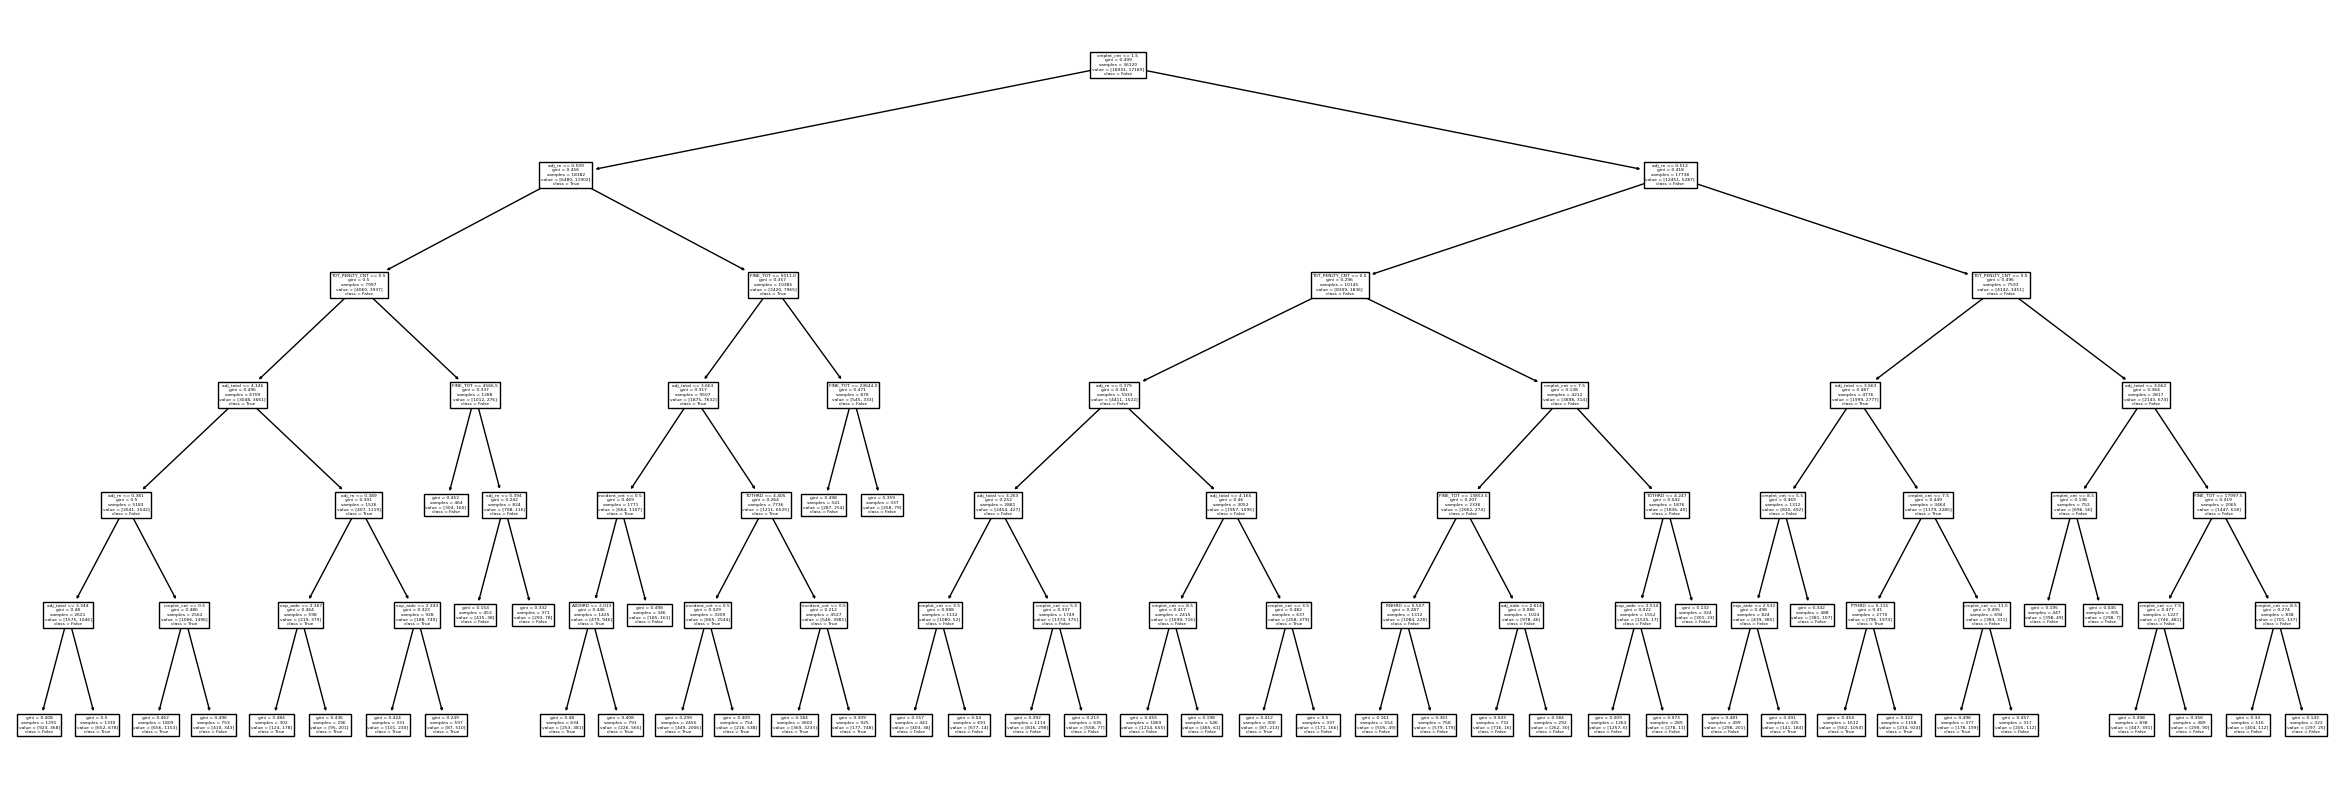

In [ ]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier

dt_params = {'max_depth':[2,3,4,5,6,7],
             'min_samples_leaf':[0.008,0.009,0.01,0.011,0.012]}
# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = GridSearchCV(DecisionTreeClassifier(), param_grid=dt_params, cv = 20)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_train)

# Import accuracy_score
from sklearn.metrics import accuracy_score
print('Best model parameters: ',dt.best_params_)

print('accuracy for training set: ', dt.score(X_train, y_train).round(2))
# Compute test set accuracy

print("Test set accuracy: ", dt.score(X_test, y_test))

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(30,10))
plot_tree(dt.best_estimator_,feature_names=X_train.columns,class_names=['False','True'])
plt.show()

In [ ]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.ensemble import RandomForestClassifier

dt_params = {'n_estimators':[10,50],
            'max_depth':[3,4,5,6],
             'min_samples_leaf':[0.008,0.009,0.01]}
# Instantiate a RandomForest
rf = GridSearchCV(RandomForestClassifier(), param_grid=dt_params, cv = 20)

# Fit dt to the training set
rf.fit(X_train, y_train)

# Predict test set labels
y_pred = rf.predict(X_train)

# Import accuracy_score
from sklearn.metrics import accuracy_score
print('Best model parameters: ',rf.best_params_)

print('accuracy for training set: ', rf.score(X_train, y_train).round(2))
# Compute test set accuracy

print("Test set accuracy: ", rf.score(X_test, y_test))


NameError: name 'X_train' is not defined

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.71911e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.29762e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Best parameters:  {'alpha': 10}
Ridge Train R2:  0.25
Ridge Test R2:  0.244


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.704e+03, tolerance: 7.209e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.e

Best parameters:  {'alpha': 0}
Lasso Train R2:  0.25
Lasso Test R2:  0.244


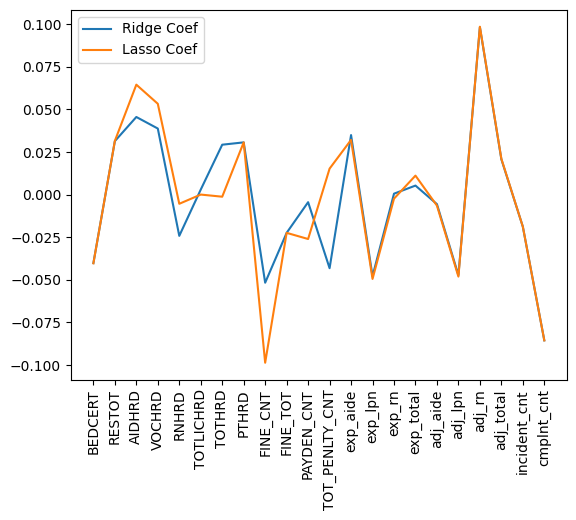

In [ ]:
from sklearn.preprocessing import StandardScaler


#splits the training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 20)

SS = StandardScaler()
X_train_scaled = SS.fit_transform(X_train)
X_test_scaled = SS.transform(X_test)

from sklearn.linear_model import Ridge, Lasso

params = {'alpha': [0.01,0.1,1,0,10]
          }

rg = GridSearchCV(Ridge(),param_grid=params, cv=5)
ls = GridSearchCV(Lasso(),param_grid=params, cv=5)

rg.fit(X_train_scaled,y_train)
print('Best parameters: ', rg.best_params_)
print("Ridge Train R2: ",rg.score(X_train_scaled,y_train).round(3))
print("Ridge Test R2: ",rg.score(X_test_scaled,y_test).round(3))
plt.plot(X.columns,rg.best_estimator_.coef_,label = 'Ridge Coef')
plt.xticks(rotation=90)


ls.fit(X_train_scaled,y_train)
print('Best parameters: ', ls.best_params_)
print("Lasso Train R2: ",ls.score(X_train_scaled,y_train).round(3))
print("Lasso Test R2: ",ls.score(X_test_scaled,y_test).round(3))
plt.plot(X.columns,ls.best_estimator_.coef_, label = 'Lasso Coef')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

df_scaled = StandardScaler().fit_transform(df)

df_scaled = pd.DataFrame(df_scaled, columns= df.columns)
df_scaled.head(3)


,ZIP,PHONE,COUNTY_SSA,BEDCERT,RESTOT,RN_staffing_rating,AIDHRD,VOCHRD,RNHRD,TOTLICHRD,...,exp_lpn,exp_rn,exp_total,adj_aide,adj_lpn,adj_rn,adj_total,incident_cnt,cmplnt_cnt,GoodRating
0,-0.532437,-1.412842,-0.360731,-0.831823,-0.594377,0.495390,0.123489,0.510638,-0.083954,0.232310,...,0.706397,-0.094474,0.830842,-0.333886,0.298060,-0.060973,-0.112443,-0.377065,-0.563114,1.049461
1,-0.551132,-1.413198,0.773024,-0.370050,-0.256941,1.304201,-0.246810,0.421104,0.774664,0.877728,...,-0.354088,-0.419102,-0.927547,0.176706,0.594703,1.273480,0.960039,-0.377065,-0.563114,1.049461
2,-0.528163,-1.413331,-0.141294,-0.947266,-0.706856,-0.313421,0.477001,0.198038,-0.217641,-0.060398,...,1.012123,0.678928,0.985332,0.180893,-0.093512,-0.467895,-0.155932,-0.377065,-0.563114,-0.952870


In [ ]:
from sklearn.cluster import AgglomerativeClustering
clm = AgglomerativeClustering(n_clusters=4,compute_full_tree=True, compute_distances=True).fit(df_scaled)

import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(clm)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()